# Case Study : BigMac Index
<br>
 The data is taken from the forecasting currency exchange rate on cost of living in indiviual country.
 The excel sheet have Big mac price and Hourly wages in USD Dollars from 27 countries.

- From this data, I have solved this following questions
<br>
1. Is there a relationship between the price of BigMac and the net hourly wages of workers around the world?
2. Is it possible to develop the model to predict or determine the net hourly wage of worker around the world by theprice of a BigMac in country. If so? how good is the model?
3. If a model can be constructed to determine the net hourly wages of a worker aroound the world by the price of BigMac, what would be the predicted net hourly wage of worker in a country, if the price of BigMac is $3.00?

## Machine Learning: Linear Regression Model 
- Hypothesis (*t* Distribution)
- F Statistics
- R square 

In [51]:
import pandas as pd #Pannel Dataset
import numpy as np #Numerical Dataset

In [52]:
#LOADING THE DATA
file = "big_mac.xlsx"
df  = pd.read_excel(file)
#print(df)
df.head()

,big_mac_price,hourly_wages_usd
0,1.42,1.70
1,1.86,7.80
2,1.48,2.05
3,3.14,12.30
4,2.21,9.35


In [53]:
#CREATING SCATTERPLOT FOR LINEAR REGRESSION
import matplotlib.pyplot as plt #(Basic Visualization library)
#import seaborn as sns (Advance visualization library)

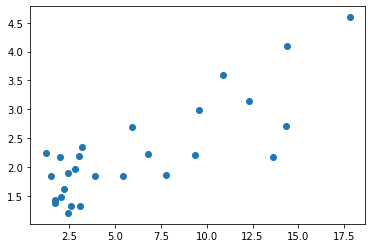

In [54]:
plot = plt.scatter(x = 'hourly_wages_usd' , y = 'big_mac_price' ,data = df)
plt.show()

### Linear Regression
- Stats model Library in Python

  -Using stats model we can able to build linear regression

In [55]:
import statsmodels.api as sm

In [56]:
#Ordinary Least Square Regression
model = sm.OLS.from_formula('hourly_wages_usd ~ big_mac_price', data = df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       hourly_wages_usd   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     48.88
Date:                Tue, 29 Jun 2021   Prob (F-statistic):           2.50e-07
Time:                        01:27:05   Log-Likelihood:                -66.251
No. Observations:                  27   AIC:                             136.5
Df Residuals:                      25   BIC:                             139.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -4.5397      1.619     -2.805

### Define Degree of Freedom
- No. of observation = No. of samples = n = 27 (why? = 27 countries) 
- degree of freedom Model = No. of independent variables(Big_mac_price) = k = 1 
- degree of freedom Residuals = n - 1 - k = 25
- the dependent variable is hourly_wages_usd

### Significance of co-efficient
(Means: the value which we got of intercept and big_mac_price is really significant or not.)
- Performing hypothesis testing since the estimated value we are predicting is mean
- Hence the coefficient falls under the *t* distribution
- Generally 95% of significance(bulk region) and alpha = 2.5% is considered and it is also called critical region.

### **key-points** 

H<sub>0</sub> = Null Hypothesis (Not Significant) near to 0

> P is nearly equal to 0

H<sub>A</sub> = Altenate  Hypothesis (Significant) !=0

> T value is far away from 0

## Results of Hypothesis:



*Result 1*<br>

<table>
<thead>
<tr><th></th><th>coef</th><th>std err</th><th>t</th><th>P>|t|</th></tr>
</thead>
<tbody>
<tr><td>Intercept</td><td> -4.5397</td><td>1.619</td><td>-2.805</td><td>0.010</td></tr>
</tbody>
</table>
p - value = 0.01 < 0.025 {Left}
<br>
Hence, Intercept has a significance and has a relationship in extracting the the net hourly_wages_usd from big mac.

*Result 2*<br>

<table>
<thead>
<tr><th></th><th>coef</th><th>std err</th><th>t</th><th>P>|t|</th></tr>
</thead>
<tbody>
<tr><td>big_mac_price</td><td> 4.7435</td><td>0.678</td><td>6.991</td><td>0.00</td></tr>
</tbody>
</table>
t - value = 0.000 < 0.025 {Right}
<br>
Hence,Big Mac has a very much significance for extracting relationship between independent and dependent variable.


### Hourly_wages = -4.5397 + 4.7435 * Big_mac_price
<br>
Hence, the Equation for model is also significant

In [57]:
#FITTED VALUES
net_hourly_wages_predict = -4.5397 + 4.7435 * df['big_mac_price']

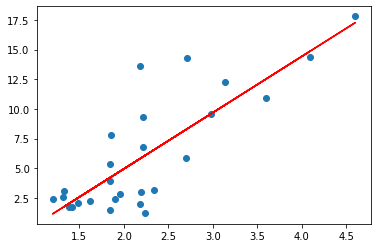

In [58]:
plot1 = plt.scatter(x = 'big_mac_price', y = 'hourly_wages_usd', data = df)
#creating a traight line in plot
plt.plot(df['big_mac_price'], net_hourly_wages_predict,'r-')
plt.show()

### Undertanding the signifance of model through ANOVA (ANalysis Of VAriance)
- Scatterpot: Red straight line is a fitted value and blue dots are the true observations.
<br>

**Is the variance of *fitted value* and *true value* are equal?**

- We got three answers
 - Total variance (SST) {Sum of square total : True values}
 - With the variance (SSR) {Sum of square : Regression}
 - Between the variance (SSE) {Sum of square : error(Between true and fitted values)}

<br>

Once we calculated all the variance, we can calculate statistics.
<br>
Formula:
<br>

F-statistics = (SSR/d *f* <sub>ssr</sub>)//(SSE/d *f* <sub>sse</sub>)
<br> **Note:**<br>
d *f* <sub>ssr</sub> = k <br>
d *f* <sub>sse</sub> = n-1-k
<br>
**How strong is the model?**
<br>
R<sub> *square* </sub> = 1 - SSE/SST
<br>
- Testing under variance of sample : *F* Distribution
<br>

H<sub>0</sub> = Null Hypothesis - 95%(Bulk region)

>The error between the two samples are very high and hence two samples are not equal

H<sub>A</sub> = Altenate  Hypothesis - 5% (Critical Region)

>The error between the two variance is low hence, two samples are equal



## Result of F statistics:

*Result*<br>

<table>
<thead>
<tr></tr>
</thead>
<tbody>
<tr><td>R-Squared</td><td> 0.662</td></tr>
<tr><td>Prob (F-statistic)</td><td>2.50e-07</td></tr>
</tbody>
</table>
P-value = 2.50 + 10<sup>7</sup> < 0.025 <br>
It comes in critical region so, the model is significant

##### CALCULATING F-STATISTICIS MANUALLY [ANOVA]
<br>
- F - statistics = $ & \frac{(sse / df_ssr)}{(sse / df_sse)} $

In [59]:
ssr = np.sum(np.square(net_hourly_wages_predict - net_hourly_wages_predict.mean()))
sse = np.sum(np.square(net_hourly_wages_predict - df['hourly_wages_usd'].values))

In [60]:
sse, ssr

(213.88429646337502, 418.1817241247)

In [61]:
df_ssr = 1 #k = No. of independent variables
df_sse = 27 - 1 - df_ssr # n - 1 - k : no. of samples

In [62]:
f_stats = (ssr/df_ssr)/(sse/df_sse)
f_stats

48.879432833479235

In [63]:
## R_SQUARE 
sst = sse + ssr
r_square = 1 - (sse/sst)
print('R Square Value = ', r_square)
#Check results with OLS sheet

R Square Value =  0.6616108294124452


In [64]:
#Correlation
df.corr()

,big_mac_price,hourly_wages_usd
big_mac_price,1.000000,0.813396
hourly_wages_usd,0.813396,1.000000


In [65]:
# Answer 2
np.square(0.813396) #method 2

0.661613052816

In [66]:
# Answer 3
net_hourly_wages_predict = -4.5397 + 4.7435 * 3
net_hourly_wages_predict

9.6908

### Answers:
<br>
-Hypothesis

> Yes there is a relationship, 0.8133 is the correlation values.

<br>

-F statistics

> Yes, you can develop the model since f- stats value is significant. and model is 66.16 is the strenght of model

<br>

-Fitted values

> 9.6908